In [1]:
import numpy as np
import xarray as xr
import xesmf as xe
from eofs.xarray import Eof
from eofs.examples import example_data_path
import xgcm
from sklearn import preprocessing
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy import stats

import matplotlib.pyplot as plt
import cartopy.feature as cft
import cartopy.crs as ccrs
import cmocean as cm

import cosima_cookbook as cc

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = UserWarning)
warnings.simplefilter('ignore')

In [2]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 251.18 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39607,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 251.18 GiB
Comm: tcp://127.0.0.1:34011,Total threads: 4
Dashboard: /proxy/36409/status,Memory: 35.88 GiB
Nanny: tcp://127.0.0.1:43287,


In [3]:
db = '/scratch/x77/db6174/mom6/archive/databases/cc_database_IAF_control_testing.db'
session = cc.database.create_session(db)
expt = ['mom6-om4-025', 
        'mom6-om4-025-IAF']

In [72]:
tauu_ctrl = cc.querying.getvar(expt[0], 'tauuo', session, frequency = '1 monthly', use_cftime = True)
tauu_test = cc.querying.getvar(expt[1], 'tauuo', session, frequency = '1 monthly', use_cftime = True)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "yh" starting at index 540. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "yh" starting at index 540. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3

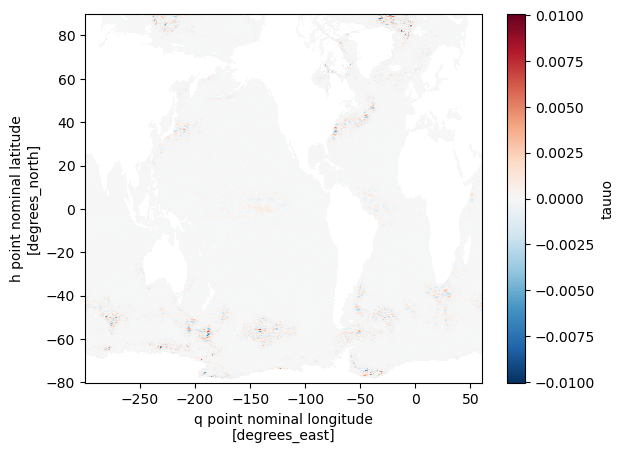

In [73]:
(tauu_ctrl - tauu_test).mean('time').plot()

In [74]:
tauv_ctrl = cc.querying.getvar(expt[0], 'tauvo', session, frequency = '1 monthly', use_cftime = True)
tauv_test = cc.querying.getvar(expt[1], 'tauvo', session, frequency = '1 monthly', use_cftime = True)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "xh" starting at index 720. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "xh" starting at index 720. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3

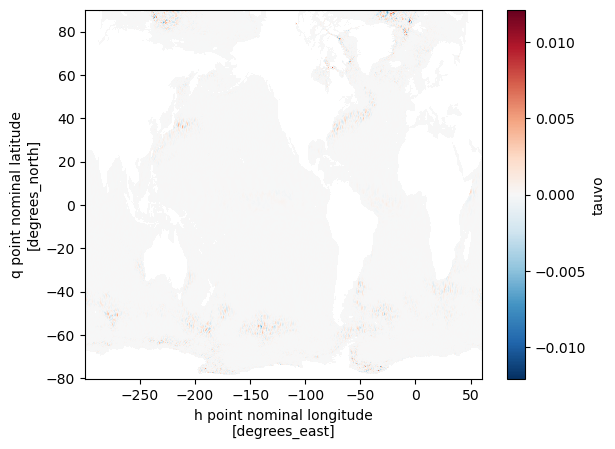

In [75]:
(tauv_ctrl.mean('time') - tauv_test.mean('time')).plot()

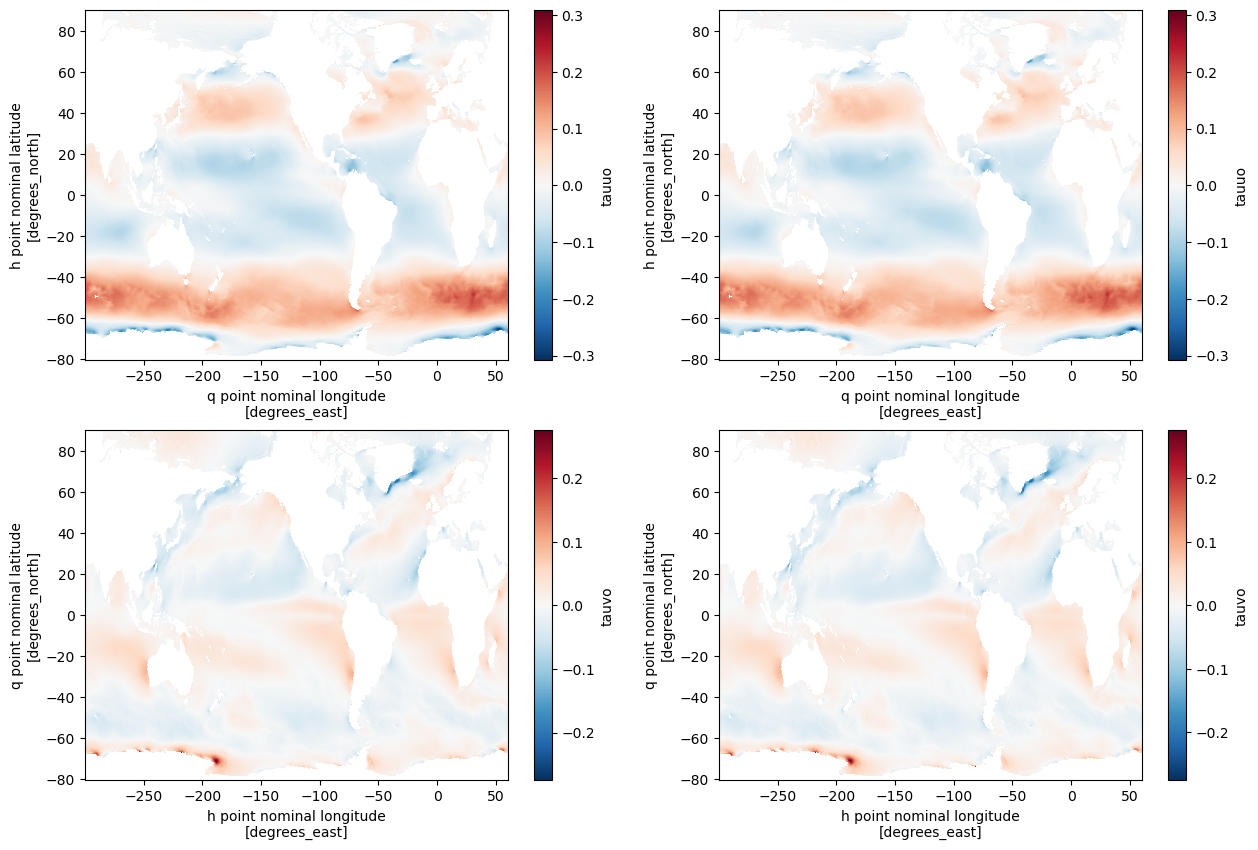

In [89]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
tauu_ctrl.mean('time').plot(ax = axes[0][0])
tauu_test.mean('time').plot(ax = axes[0][1])

tauv_ctrl.mean('time').plot(ax = axes[1][0])
tauv_test.mean('time').plot(ax = axes[1][1])

In [81]:
temp_global_ave_ctrl = cc.querying.getvar(expt[0], 'thetaoga', session, frequency = '1 monthly', use_cftime = True)
temp_global_ave_test = cc.querying.getvar(expt[1], 'thetaoga', session, frequency = '1 monthly', use_cftime = True)

salt_global_ave_ctrl = cc.querying.getvar(expt[0], 'soga', session, frequency = '1 monthly', use_cftime = True)
salt_global_ave_test = cc.querying.getvar(expt[1], 'soga', session, frequency = '1 monthly', use_cftime = True)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3

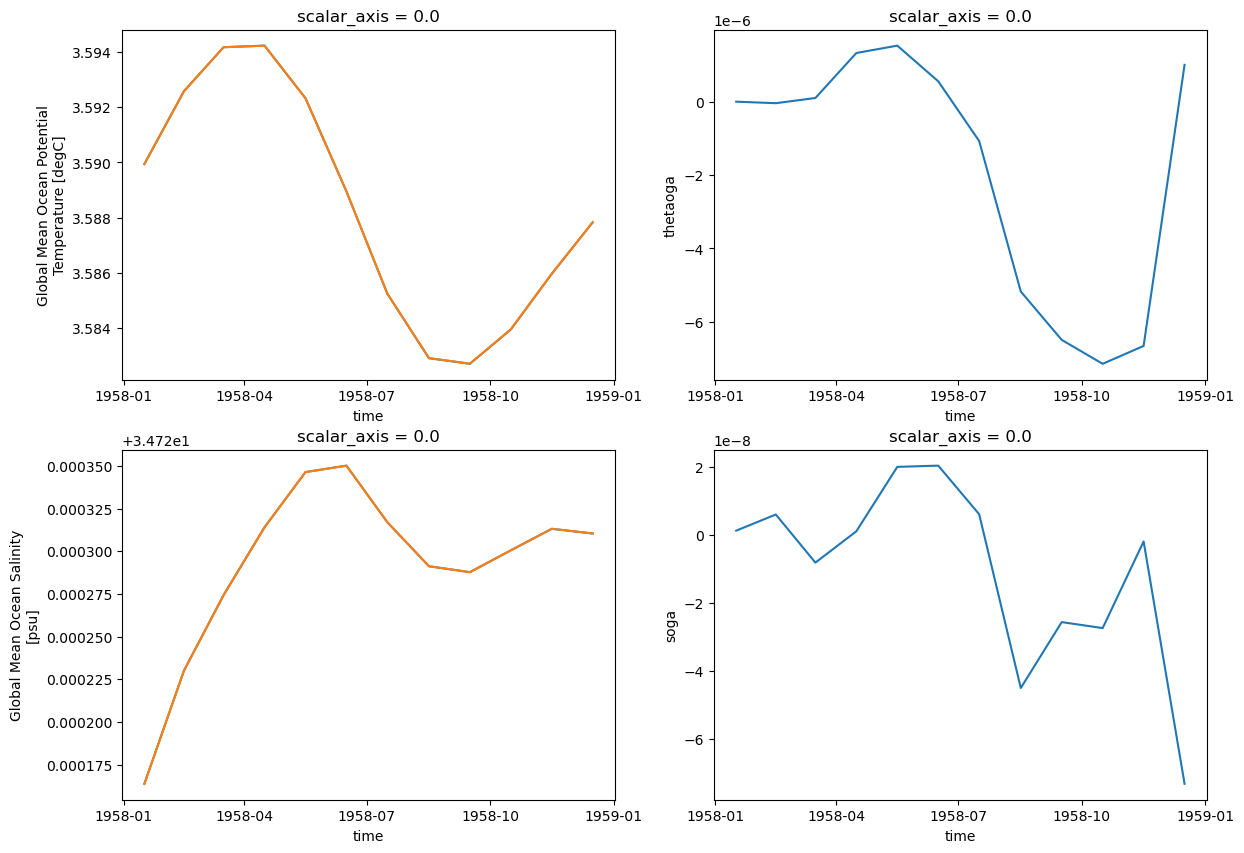

In [83]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))
temp_global_ave_ctrl.plot(ax = axes[0][0])
temp_global_ave_test.plot(ax = axes[0][0])
(temp_global_ave_ctrl - temp_global_ave_test).plot(ax = axes[0][1])

salt_global_ave_ctrl.plot(ax = axes[1][0])
salt_global_ave_test.plot(ax = axes[1][0])
(salt_global_ave_ctrl - salt_global_ave_test).plot(ax = axes[1][1])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


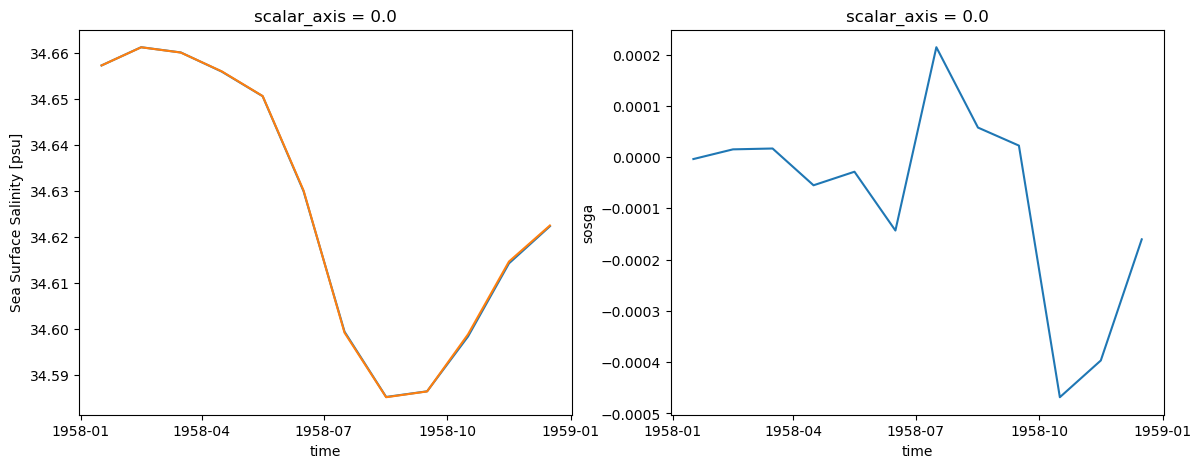

In [93]:
SSS_ave_ctrl = cc.querying.getvar(expt[0], 'sosga', session, frequency = '1 monthly', use_cftime = True)
SSS_ave_test = cc.querying.getvar(expt[1], 'sosga', session, frequency = '1 monthly', use_cftime = True)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))
SSS_ave_ctrl.plot(ax = axes[0])
SSS_ave_test.plot(ax = axes[0])
(SSS_ave_ctrl - SSS_ave_test).plot(ax = axes[1])

## What about forcing files?

In [4]:
JRA_psl_ctrl = xr.open_dataset('/g/data/ik11/inputs/mom6/OM4_025.JRA/JRA_psl.nc')
JRA_psl_test = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_psl_padded.nc')

JRA_tas_ctrl = xr.open_dataset('/g/data/ik11/inputs/mom6/OM4_025.JRA/JRA_tas.nc')
JRA_tas_test = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_tas_padded.nc')

JRA_huss_ctrl = xr.open_dataset('/g/data/ik11/inputs/mom6/OM4_025.JRA/JRA_huss.nc')
JRA_huss_test = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_huss_padded.nc')

JRA_uas_ctrl = xr.open_dataset('/g/data/ik11/inputs/mom6/OM4_025.JRA/JRA_uas.nc')
JRA_uas_test = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_uas_padded.nc')

JRA_vas_ctrl = xr.open_dataset('/g/data/ik11/inputs/mom6/OM4_025.JRA/JRA_vas.nc')
JRA_vas_test = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_vas_padded.nc')

JRA_rsds_ctrl = xr.open_dataset('/g/data/ik11/inputs/mom6/OM4_025.JRA/JRA_rsds.nc')
JRA_rsds_test = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_rsds_padded.nc')

JRA_rlds_ctrl = xr.open_dataset('/g/data/ik11/inputs/mom6/OM4_025.JRA/JRA_rlds.nc')
JRA_rlds_test = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_rlds_padded.nc')

JRA_prra_ctrl = xr.open_dataset('/g/data/ik11/inputs/mom6/OM4_025.JRA/JRA_prra.nc')
JRA_prra_test = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_prra_padded.nc')

JRA_prsn_ctrl = xr.open_dataset('/g/data/ik11/inputs/mom6/OM4_025.JRA/JRA_prsn.nc')
JRA_prsn_test = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_prsn_padded.nc')

JRA_friver_ctrl = xr.open_dataset('/g/data/ik11/inputs/mom6/OM4_025.JRA/JRA_friver.nc')
JRA_friver_test = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_friver_padded.nc')

In [5]:
JRA_licalvf_ctrl = xr.open_dataset('/g/data/ik11/inputs/mom6/OM4_025.JRA/JRA_licalvf.nc')
JRA_licalvf_test = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_licalvf_padded.nc')

JRA_friver_regrid = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_friver_regrid.nc')
JRA_licalvf_regrid = xr.open_dataset('/g/data/x77/db6174/JRA55-do-padded/pad_forcing/1958/JRA_licalvf_regrid.nc')

Text(0.5, 1.0, 'prsn')

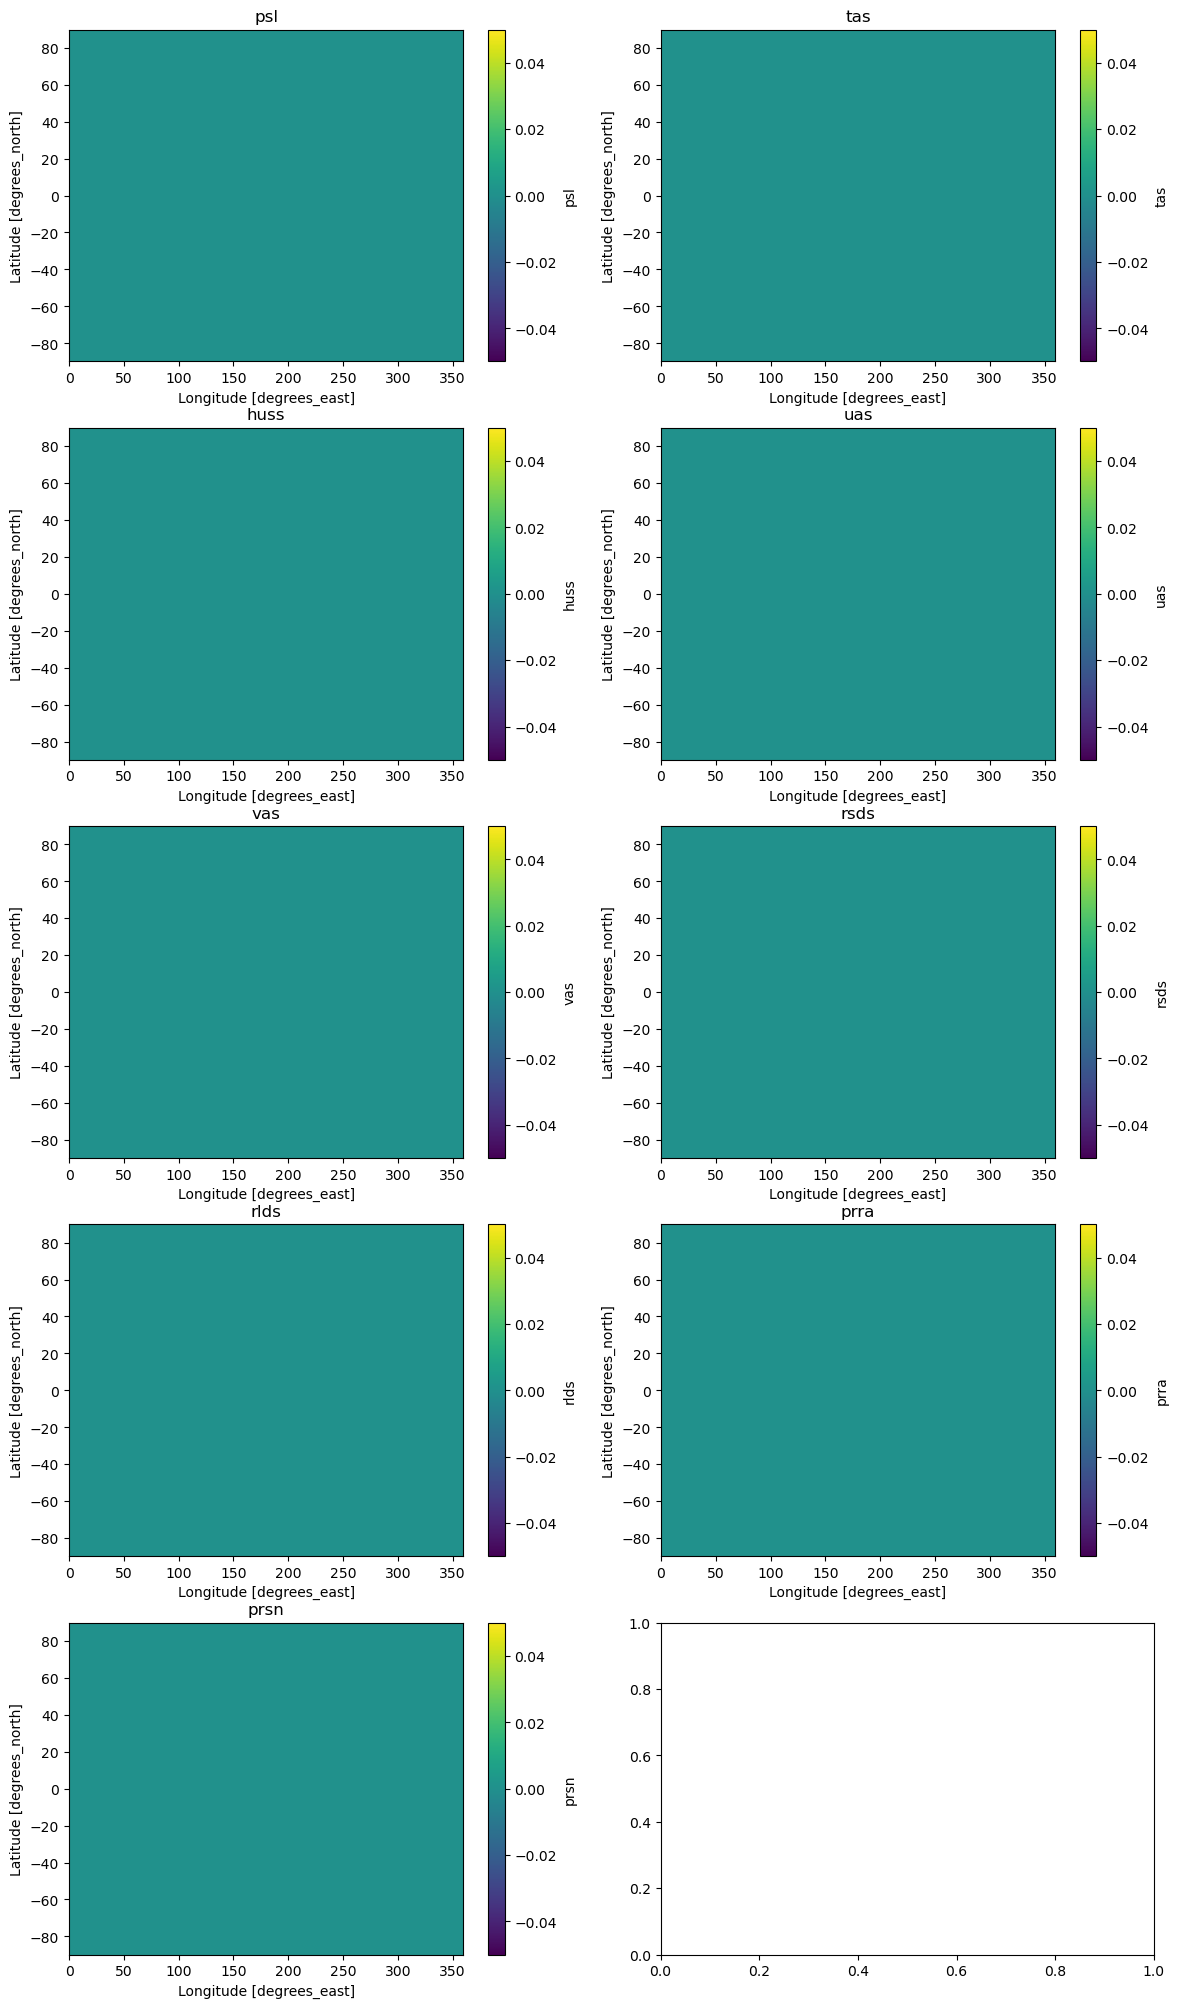

In [84]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (14, 25))

(JRA_psl_ctrl.psl - JRA_psl_test.psl).mean('time').plot(ax = axes[0][0])
(JRA_tas_ctrl.tas - JRA_tas_test.tas).mean('time').plot(ax = axes[0][1])
(JRA_huss_ctrl.huss - JRA_huss_test.huss).mean('time').plot(ax = axes[1][0])
(JRA_uas_ctrl.uas - JRA_uas_test.uas).mean('time').plot(ax = axes[1][1])
(JRA_vas_ctrl.vas - JRA_vas_test.vas).mean('time').plot(ax = axes[2][0])
(JRA_rsds_ctrl.rsds - JRA_rsds_test.rsds).mean('time').plot(ax = axes[2][1])
(JRA_rlds_ctrl.rlds - JRA_rlds_test.rlds).mean('time').plot(ax = axes[3][0])
(JRA_prra_ctrl.prra - JRA_prra_test.prra).mean('time').plot(ax = axes[3][1])
(JRA_prsn_ctrl.prsn - JRA_prsn_test.prsn).mean('time').plot(ax = axes[4][0])

axes[0][0].set_title('psl')
axes[0][1].set_title('tas')
axes[1][0].set_title('huss')
axes[1][1].set_title('uas')
axes[2][0].set_title('vas')
axes[2][1].set_title('rsds')
axes[3][0].set_title('rlds')
axes[3][1].set_title('prra')
axes[4][0].set_title('prsn')

Text(0.5, 1.0, 'licalvf - diff between ctrl and test + regridded')

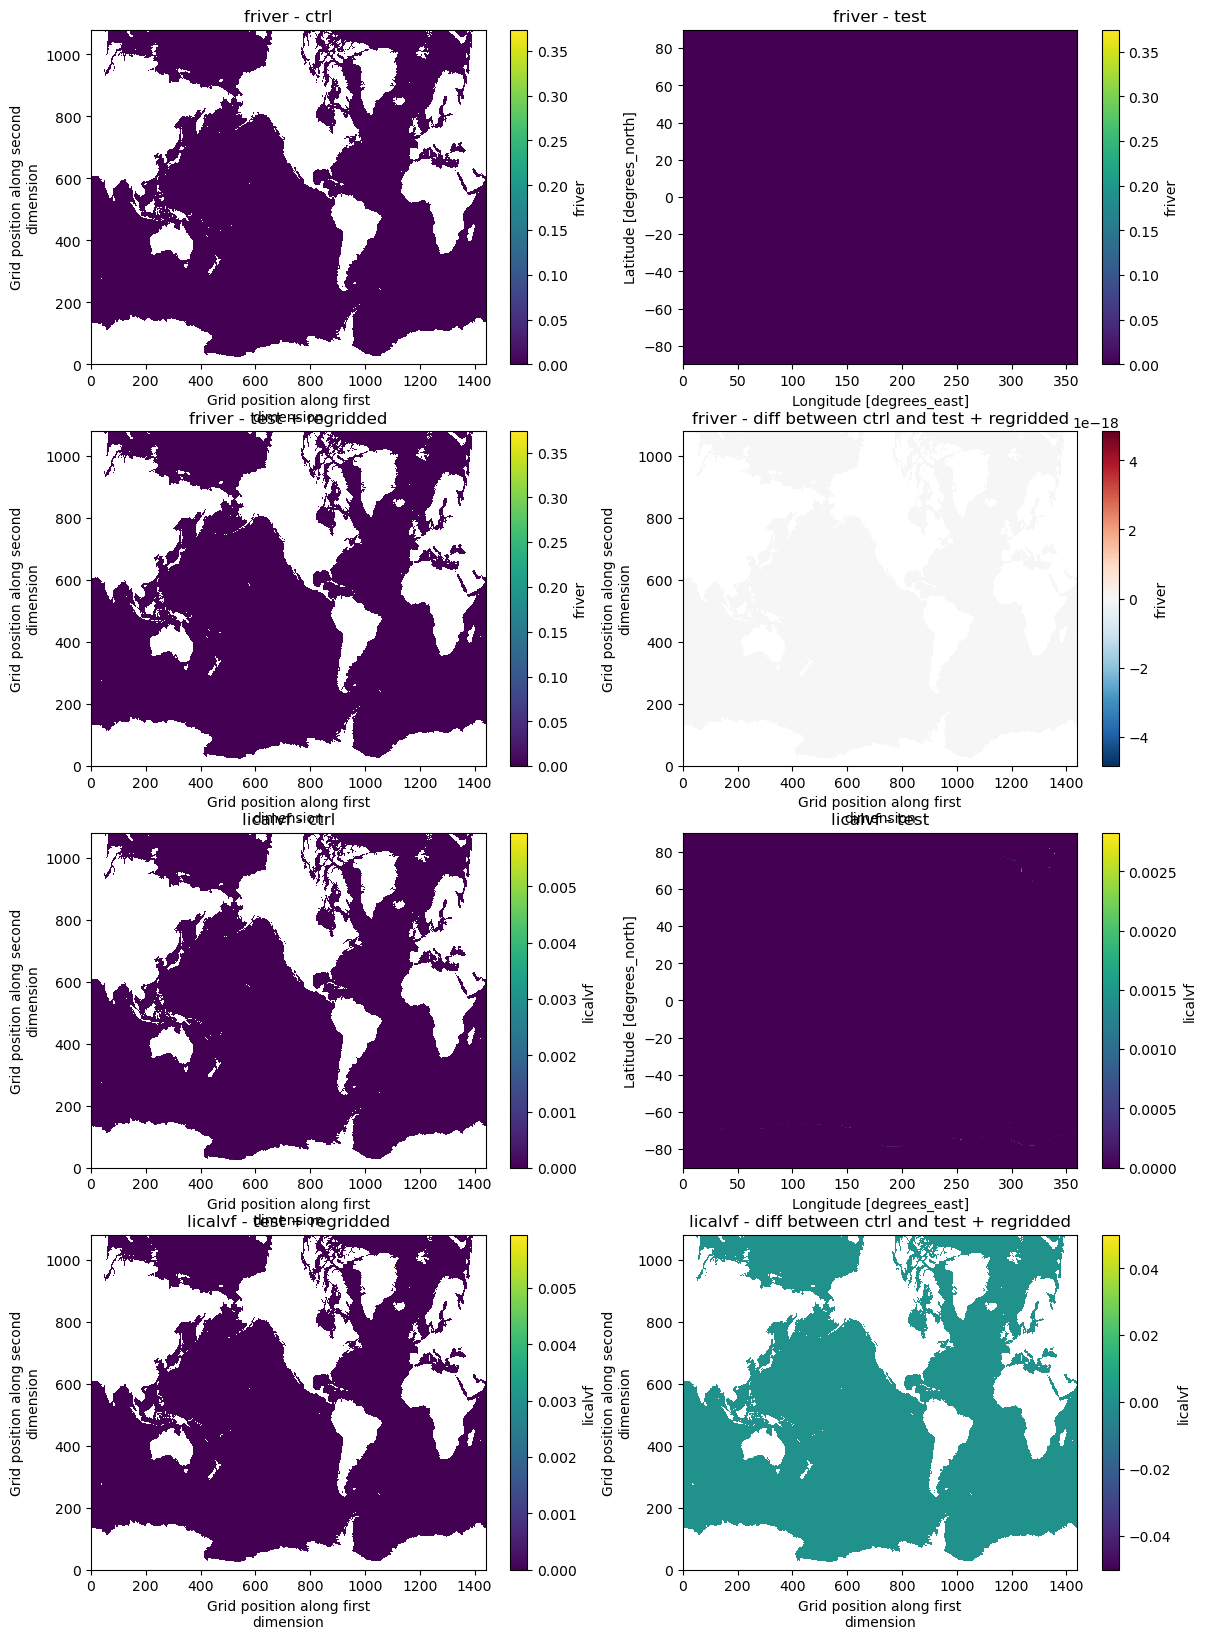

In [85]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (14, 20))

JRA_friver_ctrl.friver.mean('time').plot(ax = axes[0][0])
JRA_friver_test.friver.mean('time').plot(ax = axes[0][1])
JRA_friver_regrid.friver.mean('time').plot(ax = axes[1][0])
(JRA_friver_ctrl - JRA_friver_regrid).friver.mean('time').plot(ax = axes[1][1])

JRA_licalvf_ctrl.licalvf.mean('time').plot(ax = axes[2][0])
JRA_licalvf_test.licalvf.mean('time').plot(ax = axes[2][1])
JRA_licalvf_regrid.licalvf.mean('time').plot(ax = axes[3][0])
(JRA_licalvf_ctrl - JRA_licalvf_regrid).licalvf.mean('time').plot(ax = axes[3][1])

axes[0][0].set_title('friver - ctrl')
axes[0][1].set_title('friver - test')
axes[1][0].set_title('friver - test + regridded')
axes[1][1].set_title('friver - diff between ctrl and test + regridded')
axes[2][0].set_title('licalvf - ctrl')
axes[2][1].set_title('licalvf - test')
axes[3][0].set_title('licalvf - test + regridded')
axes[3][1].set_title('licalvf - diff between ctrl and test + regridded')

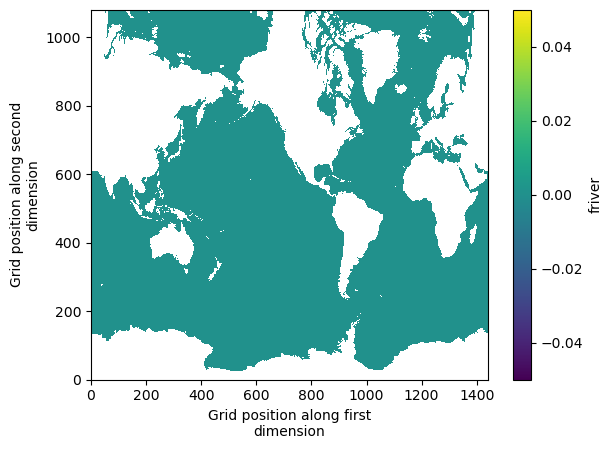

In [94]:
(JRA_friver_ctrl.mean('time') - JRA_friver_regrid.mean('time')).friver.plot()

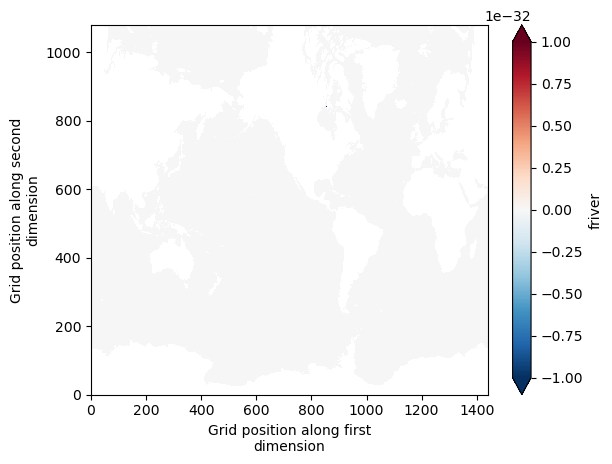

In [10]:
(JRA_friver_ctrl - JRA_friver_regrid).mean('time').friver.plot(vmin = -1e-32, vmax = 1e-32, cmap = 'RdBu_r')

In [16]:
(JRA_friver_ctrl - JRA_friver_regrid).mean('time').friver.argmax()

<xarray.DataArray 'friver' ()> Size: 8B
array(1545997)

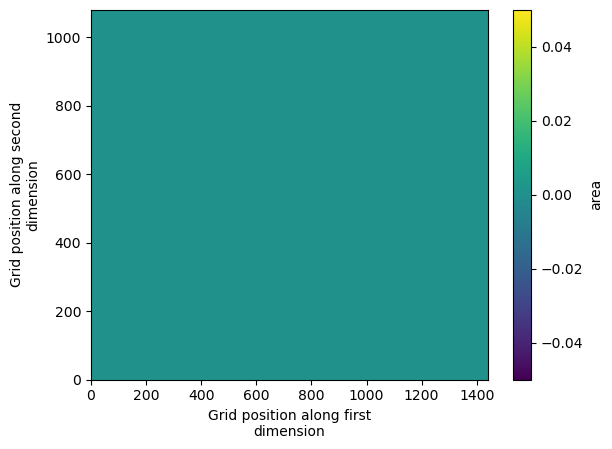

In [70]:
(JRA_friver_ctrl.area - JRA_friver_regrid.area).plot()

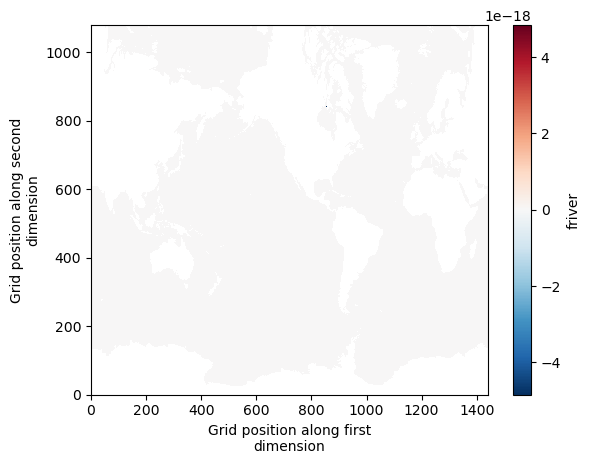

In [25]:
(JRA_friver_ctrl.friver - JRA_friver_regrid.friver).mean('time').plot()

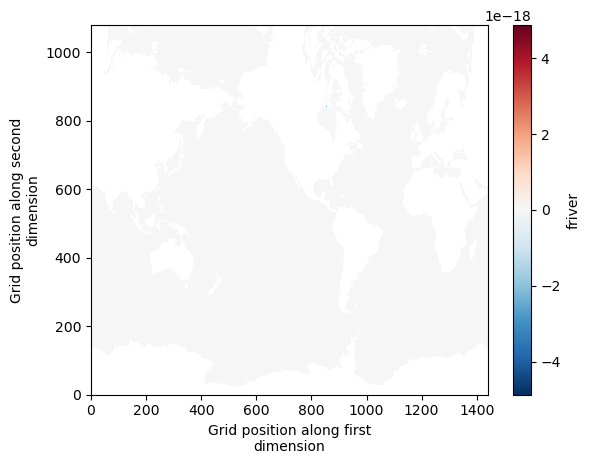

In [31]:
(JRA_friver_ctrl.friver[1:-1] - JRA_friver_regrid.friver[1:-1]).mean('time').plot()

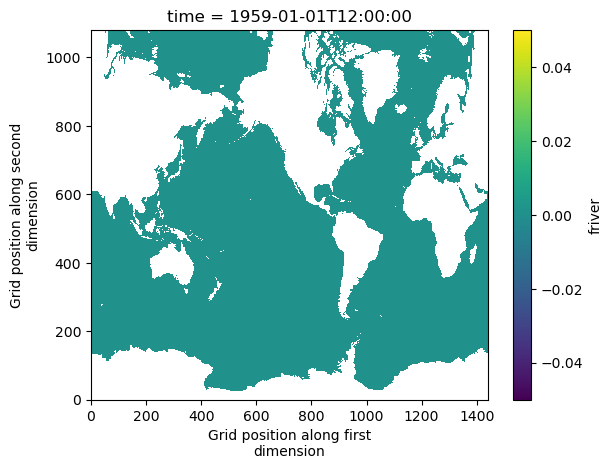

In [32]:
(JRA_friver_ctrl.friver[-1] - JRA_friver_regrid.friver[-1]).plot()

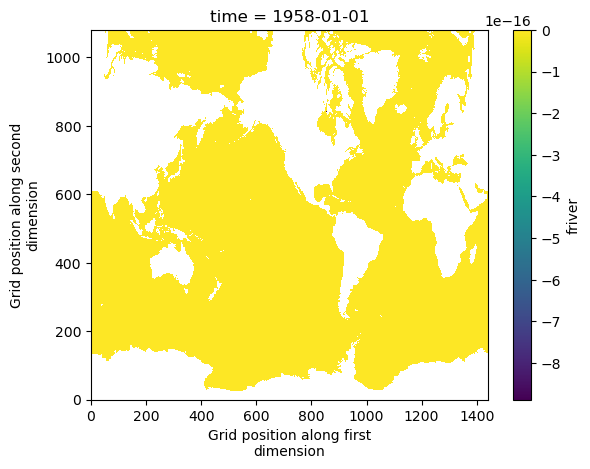

In [34]:
(JRA_friver_ctrl.friver[0] - JRA_friver_regrid.friver[0]).plot()